<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#KM-CD8" data-toc-modified-id="KM-CD8-4.1">KM CD8</a></span></li><li><span><a href="#Cox-CD8" data-toc-modified-id="Cox-CD8-4.2">Cox CD8</a></span></li><li><span><a href="#KM-CD3" data-toc-modified-id="KM-CD3-4.3">KM CD3</a></span></li><li><span><a href="#Cox-CD3" data-toc-modified-id="Cox-CD3-4.4">Cox CD3</a></span></li><li><span><a href="#KM-CD56" data-toc-modified-id="KM-CD56-4.5">KM CD56</a></span></li><li><span><a href="#Cox-CD56" data-toc-modified-id="Cox-CD56-4.6">Cox CD56</a></span></li><li><span><a href="#KM-CD20" data-toc-modified-id="KM-CD20-4.7">KM CD20</a></span></li><li><span><a href="#Cox-CD20" data-toc-modified-id="Cox-CD20-4.8">Cox CD20</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
library(survival)
library(survminer)
library(forestmodel)

Loading required package: ggplot2

Loading required package: ggpubr



# Functions

In [2]:
source("~/git/iMATRIX-Atezo_Biomarker/R/ggplot2_theme.R")
source("~/git/iMATRIX-Atezo_Biomarker/R/Heatmap_functions.R")

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"

# Main

In [4]:
IND_metadata <- read.csv(file.path(datapath,"IND_estimate_metadata_IHC_trb_tmb.csv"),
                         header = T, stringsAsFactors = F, check.names = F)

## KM CD8

In [5]:
summary(IND_metadata$IHC_CD8)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   0.070   0.220   1.149   1.242  10.280 

In [6]:
summary(IND_metadata$IHC_CD3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0006  0.1600  0.5700  6.1304  3.0500 69.1000       9 

In [7]:
tapply(IND_metadata$IHC_CD8, IND_metadata$cancer, summary)

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.770   2.620   3.310   3.489   4.610   6.250 

$`Solid tumour`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.0600  0.1600  0.6815  0.6150 10.2800 


In [8]:
tapply(IND_metadata$IHC_CD3, IND_metadata$cancer, summary)

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0022  7.4950 17.2600 24.5547 34.3050 69.1000 

$`Solid tumour`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0006  0.1225  0.3850  1.7246  1.5600 23.7100       9 


In [9]:
IND_metadata$CD8group <- NA

IND_metadata$CD8group[IND_metadata$IHC_CD8 >= 1.242] <- "High"

IND_metadata$CD8group[IND_metadata$IHC_CD8 > 0.070 &
                      IND_metadata$IHC_CD8 < 1.242] <- "Intermediate"

IND_metadata$CD8group[IND_metadata$IHC_CD8 <= 0.070] <- "Low"

In [10]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD8group, data= IND_metadata)
    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95), font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD8 protein expression")

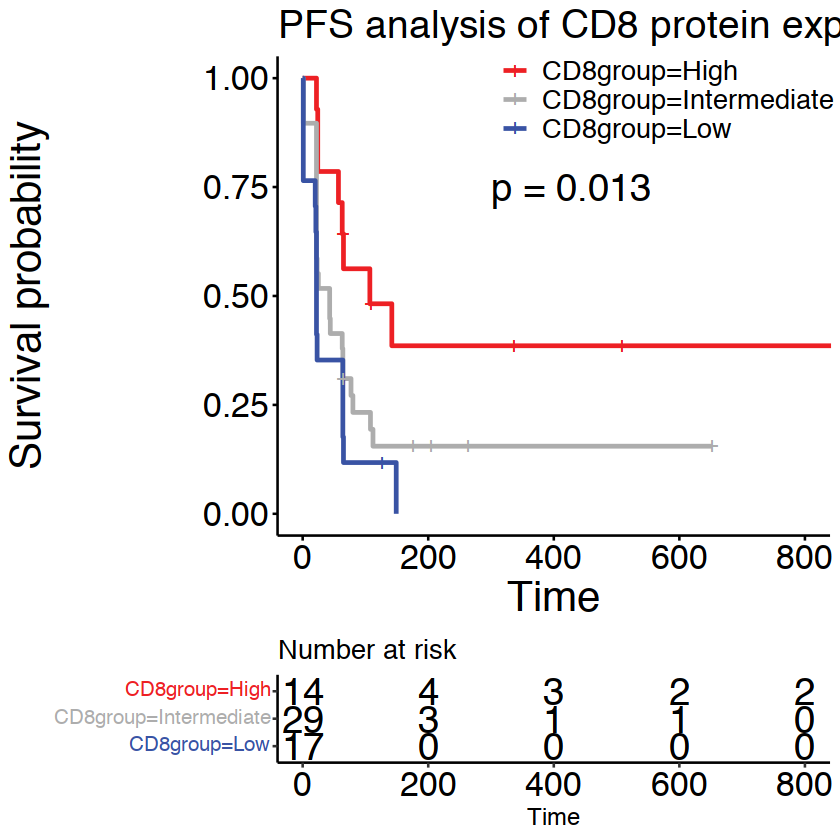

In [11]:
kmplot

In [12]:
pdf(file = paste0(plotpath,"KM_CD8_IHC.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

## Cox CD8

In [13]:
IND_metadata$CD8group <- factor(IND_metadata$CD8group,
                               levels = c("Low", "Intermediate", "High"))

In [14]:
options(scipen = 999)

In [15]:
table(IND_metadata$sample_origin)


         Adrenal gland                   Bone                  Brain 
                     5                      7                      5 
Connective/Soft tissue                 Kidney                   Lung 
                    10                      5                     11 
            Lymph node                 Others 
                    11                     12 

In [23]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ IHC_CD8 + sample_origin + AGE,
                  data = IND_metadata)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ IHC_CD8 + sample_origin + 
    AGE, data = IND_metadata)

  n= 60, number of events= 49 
   (6 observations deleted due to missingness)

                                        coef exp(coef) se(coef)      z Pr(>|z|)
IHC_CD8                             -0.28728   0.75030  0.13211 -2.175   0.0297
sample_originBone                    0.41405   1.51294  0.67537  0.613   0.5398
sample_originBrain                   0.54572   1.72586  0.71744  0.761   0.4469
sample_originConnective/Soft tissue  0.41727   1.51781  0.64623  0.646   0.5185
sample_originKidney                  0.26797   1.30731  0.75849  0.353   0.7239
sample_originLung                    0.08715   1.09106  0.67028  0.130   0.8966
sample_originLymph node             -0.31580   0.72921  0.73874 -0.427   0.6690
sample_originOthers                 -0.35859   0.69866  0.69064 -0.519   0.6036
AGE                                 -0.00180   0.99820  0.03274 -0.055   0.9562
              

In [24]:
panels <- list(
#left side
  list(width = 0.03),
# variable column    
  list(width = 0.12, display = ~variable, heading = "Variable"),
    list(width = 0.1, display = ~level),
# N column
  list(width = 0.05, display = ~n, hjust = 1, heading = "N (%)"),
# right vertical line for N
    list(width = 0.03, item = "vline", hjust = 0.5),
# forest plot  
    list(width = 0.55, item = "forest", hjust = 0.5, heading = "Hazard ratio", linetype = "dashed", line_x = 0),
# right vertical line for forest    
  list(width = 0.03, item = "vline", hjust = 0.5),
# data column    
  list(width = 5, display = ~ ifelse(reference, "", sprintf("%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high))), display_na = NA, heading = "HR (%CI)"),
  list(
    width = 5,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"),
  list(width = 0.08)
)

In [26]:
cd8_cox <- forest_model(coxmodel,exponentiate = TRUE, panels) + 
labs(title = "Cox for CD8 protein expression")

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


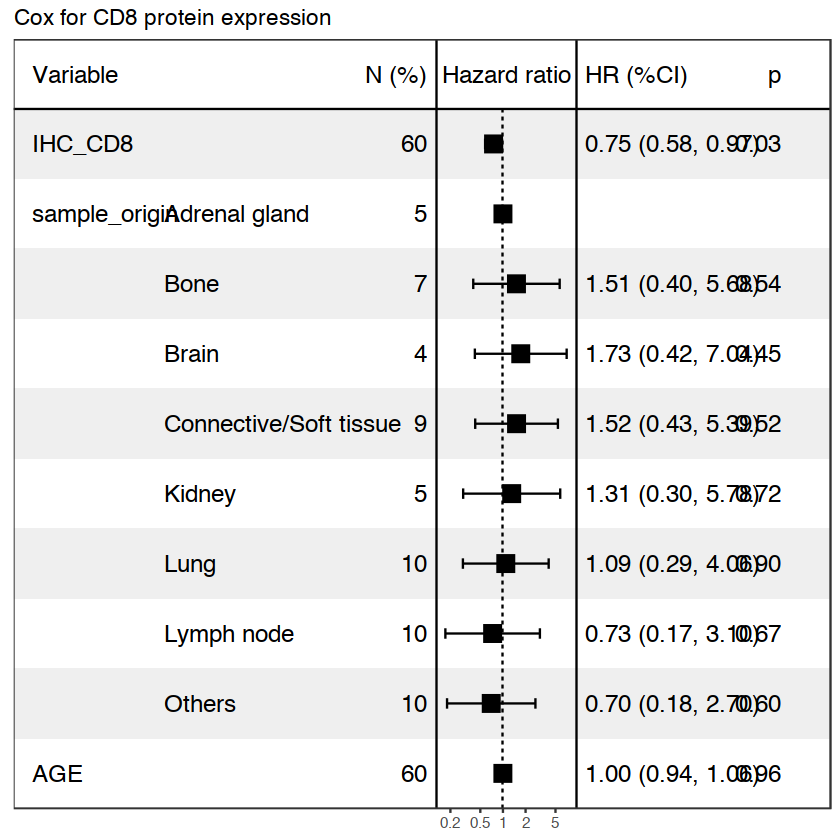

In [27]:
cd8_cox

In [28]:
pdf(file = paste0(plotpath,"CD8_IHC_cox.pdf"),
    width = 10, 
    height = 12,
    useDingbats = FALSE)

cd8_cox

dev.off()

pdf 
  2

## KM CD3

In [18]:
summary(IND_metadata$IHC_CD3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0006  0.1600  0.5700  6.1304  3.0500 69.1000       9 

In [19]:
IND_metadata$CD3group <- NA
IND_metadata$CD3group[IND_metadata$IHC_CD3 >= 3.05] <- "High"

IND_metadata$CD3group[IND_metadata$IHC_CD3 > 0.16 &
                      IND_metadata$IHC_CD3 < 3.05] <- "Intermediate"

IND_metadata$CD3group[IND_metadata$IHC_CD3 <= 0.16] <- "Low"

In [20]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD3group, data= IND_metadata)
    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95), font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD3 protein expression")

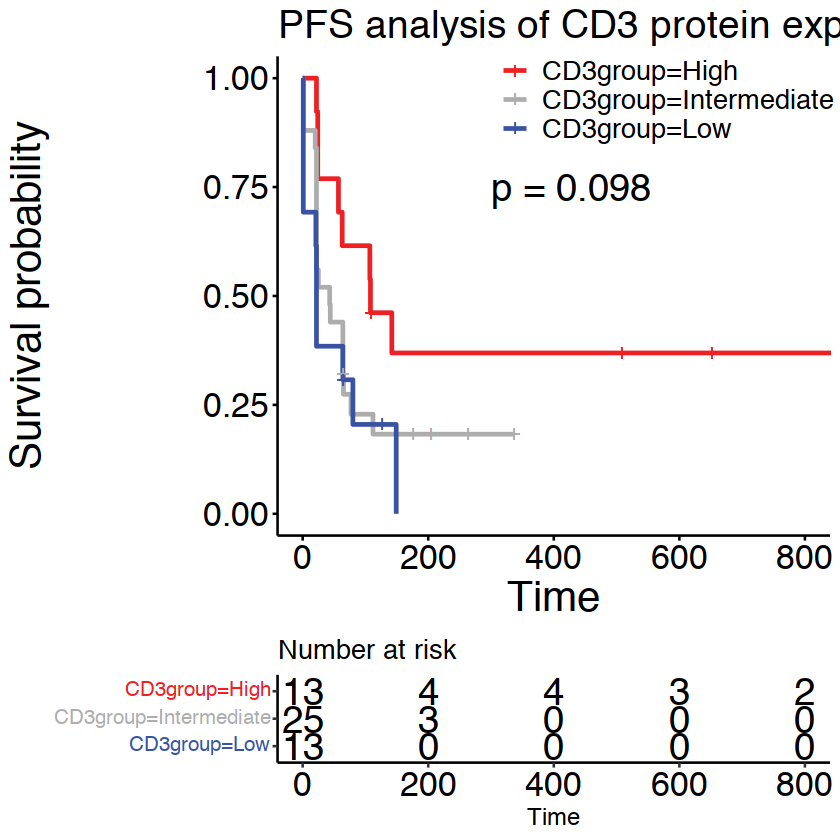

In [21]:
kmplot

In [22]:
pdf(file = paste0(plotpath,"KM_CD3_IHC.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

## Cox CD3

In [23]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ IHC_CD3 + sample_origin + AGE, data = IND_metadata)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ IHC_CD3 + sample_origin + 
    AGE, data = IND_metadata)

  n= 51, number of events= 40 
   (15 observations deleted due to missingness)

                                        coef exp(coef) se(coef)      z Pr(>|z|)
IHC_CD3                             -0.02011   0.98009  0.01559 -1.290    0.197
sample_originBone                    0.47899   1.61444  0.79699  0.601    0.548
sample_originBrain                   0.65359   1.92243  0.77023  0.849    0.396
sample_originConnective/Soft tissue  0.45966   1.58354  0.71201  0.646    0.519
sample_originKidney                  0.09643   1.10124  0.83675  0.115    0.908
sample_originLung                    0.11335   1.12003  0.73626  0.154    0.878
sample_originLymph node             -0.48494   0.61573  0.77292 -0.627    0.530
sample_originOthers                 -0.65830   0.51773  0.79627 -0.827    0.408
AGE                                  0.01547   1.01559  0.03445  0.449    0.653

            

In [24]:
cd3_cox <- forest_model(coxmodel,exponentiate = TRUE) + labs(title = "Cox for CD3 protein expression")

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


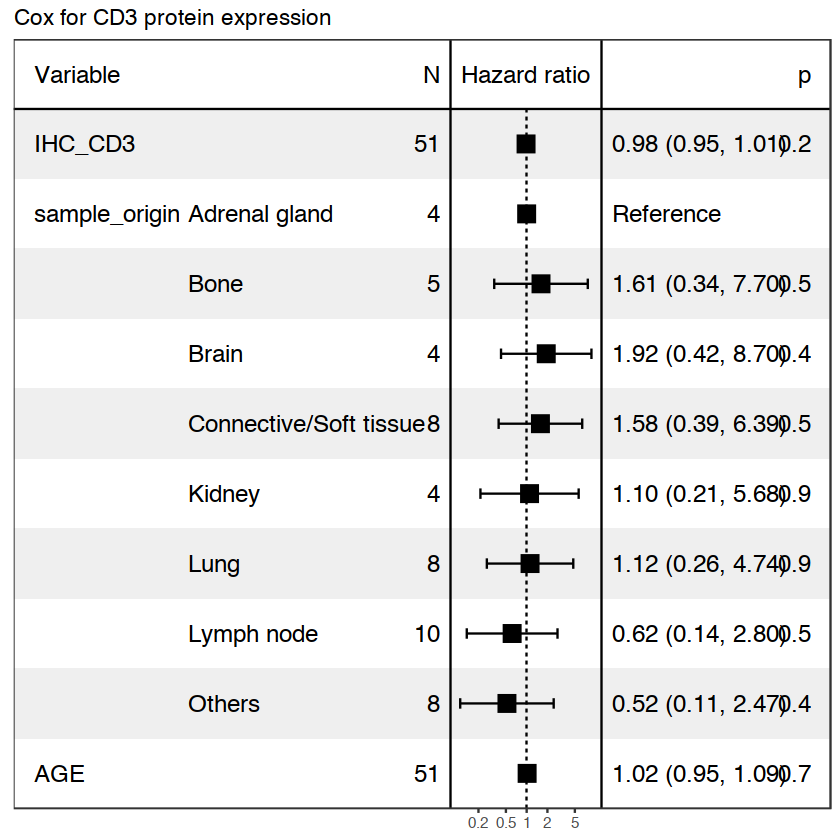

In [25]:
cd3_cox

In [26]:
pdf(file = paste0(plotpath,"CD3_IHC_cox.pdf"),
    width = 8, 
    height = 10,
    useDingbats = FALSE)

cd3_cox

dev.off()

pdf 
  2

## KM CD56

In [32]:
summary(IND_metadata$IHC_CD56)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.01    0.41   11.03   18.69   74.97       9 

In [33]:
IND_metadata$CD56group <- NA
IND_metadata$CD56group[IND_metadata$IHC_CD56 >= 18.69] <- "High"

IND_metadata$CD56group[IND_metadata$IHC_CD56 > 0.01 &
                      IND_metadata$IHC_CD56 < 18.69] <- "Intermediate"

IND_metadata$CD56group[IND_metadata$IHC_CD56 <= 0.01] <- "Low"

In [34]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD56group, data= IND_metadata)
    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95), font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD56 protein expression")

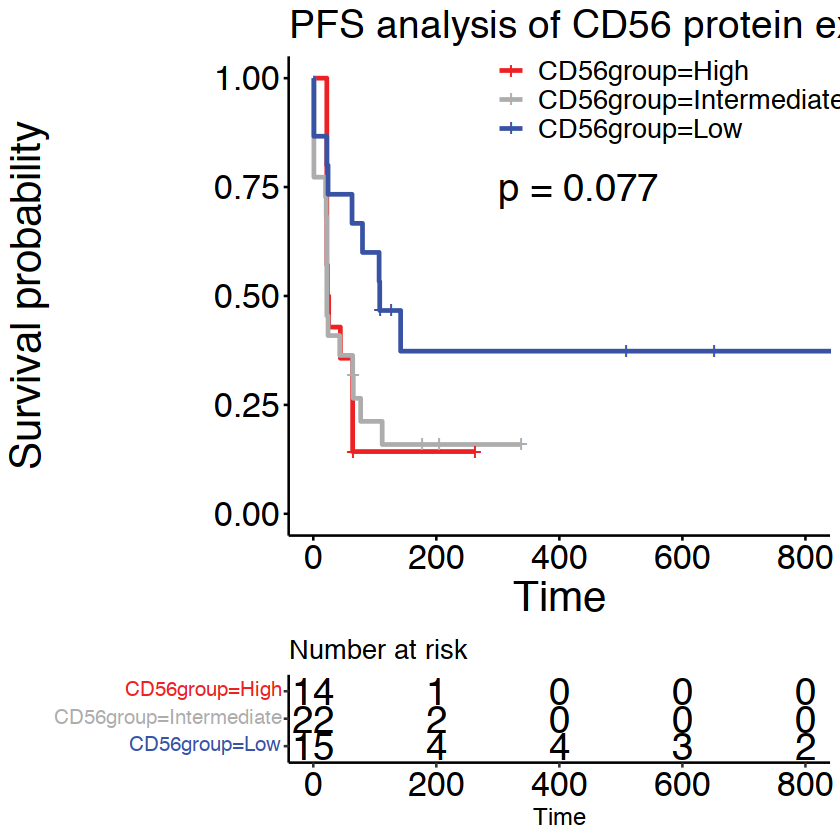

In [35]:
kmplot

In [36]:
pdf(file = paste0(plotpath,"KM_CD56_IHC.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

## Cox CD56

In [40]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ IHC_CD56 + sample_origin , data = IND_metadata)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ IHC_CD56 + sample_origin, 
    data = IND_metadata)

  n= 51, number of events= 40 
   (15 observations deleted due to missingness)

                                          coef  exp(coef)   se(coef)      z
IHC_CD56                             0.0008275  1.0008278  0.0100157  0.083
sample_originBone                    0.4797326  1.6156423  0.6851559  0.700
sample_originBrain                   0.4131570  1.5115824  0.7675302  0.538
sample_originConnective/Soft tissue  0.2986560  1.3480458  0.6779406  0.441
sample_originKidney                  0.0373256  1.0380309  0.7690616  0.049
sample_originLung                   -0.1304658  0.8776865  0.7031627 -0.186
sample_originLymph node             -0.7940119  0.4520276  0.7203968 -1.102
sample_originOthers                 -0.4857813  0.6152163  0.6944537 -0.700
                                    Pr(>|z|)
IHC_CD56                               0.934
sample_originBone                      0.484

## KM CD20

In [52]:
summary(IND_metadata$IHC_CD20)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0001  0.0031  0.0300  4.6241  0.5400 82.0600      12 

In [53]:
IND_metadata$CD20group <- NA
IND_metadata$CD20group[IND_metadata$IHC_CD20 >= 0.5400] <- "High"

IND_metadata$CD20group[IND_metadata$IHC_CD20 > 0.0031 &
                      IND_metadata$IHC_CD20 < 0.5400] <- "Intermediate"

IND_metadata$CD20group[IND_metadata$IHC_CD20 <= 0.0031] <- "Low"

In [54]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD20group, data= IND_metadata)
    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(200, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95), font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD20 protein expression")

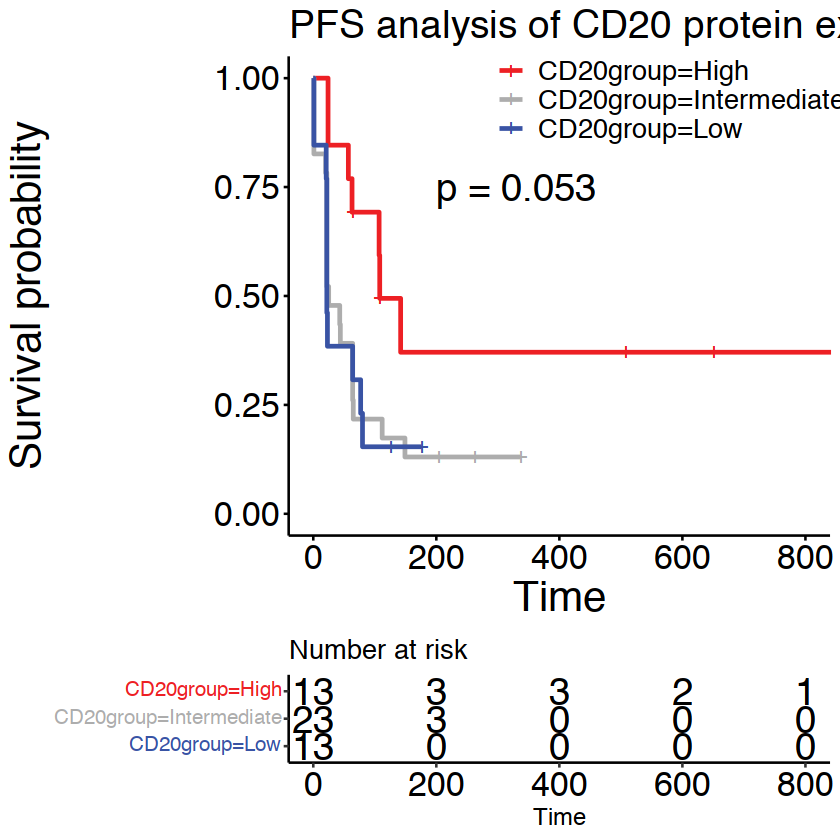

In [55]:
kmplot

## Cox CD20

In [57]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ IHC_CD20 + disease_group , data = IND_metadata)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ IHC_CD20 + disease_group, 
    data = IND_metadata)

  n= 49, number of events= 39 
   (17 observations deleted due to missingness)

                          coef exp(coef) se(coef)      z Pr(>|z|)  
IHC_CD20               0.02355   1.02383  0.01964  1.199   0.2305  
disease_groupLymphoma -1.42289   0.24102  0.91524 -1.555   0.1200  
disease_groupNBL      -0.45177   0.63650  0.71016 -0.636   0.5247  
disease_groupOS        0.59414   1.81147  0.68531  0.867   0.3860  
disease_groupOthers   -0.07318   0.92944  0.76620 -0.096   0.9239  
disease_groupRMS       1.37383   3.95044  0.66595  2.063   0.0391 *
disease_groupRT       -0.59203   0.55320  1.13114 -0.523   0.6007  
disease_groupSARC      0.87125   2.38989  0.73031  1.193   0.2329  
disease_groupWILMS     0.01770   1.01786  0.67231  0.026   0.9790  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                      exp(coef) exp(-coef) lower .95 upper .95
IHC_CD2